In [1]:
# Import your libraries
#pip install xgboost

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Ref. http://www.diamond-calculator.com/

## Dataset

In [3]:
train= pd.read_csv('train.csv', index_col=0)

In [4]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.71,Fair,F,SI1,57.0,68.0,6.05,5.87,3.40,2198
1,0.75,Premium,F,VVS2,62.4,57.0,5.88,5.75,3.63,3822
2,0.70,Good,H,VS2,59.1,65.0,5.75,5.85,3.43,2234
3,1.75,Premium,I,VS1,60.6,60.0,7.80,7.84,4.74,12416
4,1.18,Premium,G,VVS2,59.7,58.0,6.94,6.90,4.13,9537


In [5]:
train.shape

(40455, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [7]:
train.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797765,61.746387,57.458349,5.732448,5.736642,3.539624,3939.115486
std,0.471240,1.435767,2.234047,1.116915,1.147165,0.707259,3985.487211
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,956.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2416.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5339.000000
max,4.500000,79.000000,95.000000,10.230000,58.900000,31.800000,18823.000000


In [8]:
#Min values o ZERO in x,y,z

## Carat
weight of the diamond

In [9]:
carat_ranges=sorted(train.carat.unique())
print("Carat ranges from" ,min(carat_ranges), "to",max(carat_ranges))

Carat ranges from 0.2 to 4.5


## Cut

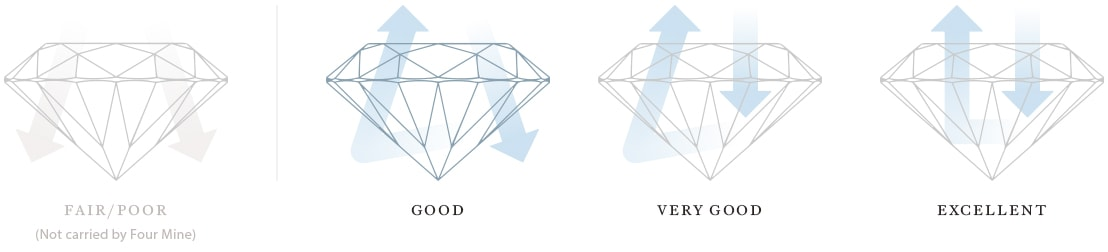

https://www.withclarity.com/education/diamond-education/diamond-cut#:~:text=The%20ideal%20diamond%20is%20cut%20such%20that%20light,With%20ideal%20cutting%2C%20the%20refraction%20is%20most%20noticeable.

In [10]:
cut_train=list(train.cut.unique())
cut_train

['Fair', 'Premium', 'Good', 'Very Good', 'Ideal']

## Color

In [11]:
color_categories=sorted(train.color.unique())
print("From best to worst color type", color_categories)

From best to worst color type ['D', 'E', 'F', 'G', 'H', 'I', 'J']


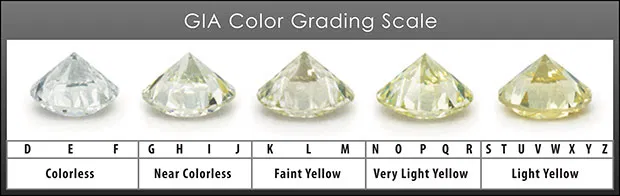

## Clarity

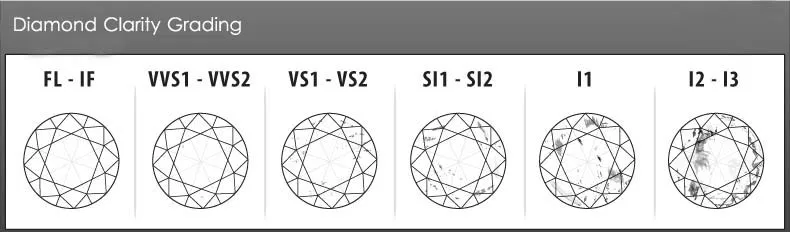

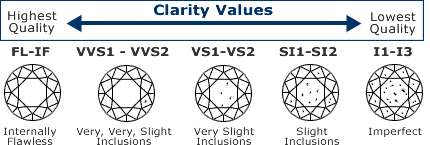

Choose Clarity: Clarity or inclusions are what really make a difference in the price, but NOT always in how the stone looks.

In [12]:
##We have to make a dictionary:
clarity_train=list(train.clarity.unique())
clarity_train

['SI1', 'VVS2', 'VS2', 'VS1', 'VVS1', 'I1', 'SI2', 'IF']

train1 = train.copy()
train1.head()

### Table
The width of the diamond’s table expressed as a percentage of its average diameter

In [13]:
table_ranges=sorted(train.table.unique())
print("Table ranges from" ,min(table_ranges), "to",max(table_ranges))

Table ranges from 44.0 to 95.0


## Depth

In [14]:
depth_ranges=sorted(train.depth.unique())
print("Depth ranges from" ,min(depth_ranges), "to",max(depth_ranges))

Depth ranges from 43.0 to 79.0


## X, Y, Z

In [15]:
x_ranges=sorted(train.depth.unique())
print("x ranges from" ,min(x_ranges), "to",max(x_ranges))
y_ranges=sorted(train.y.unique())
print("y ranges from" ,min(y_ranges), "to",max(y_ranges))
z_ranges=sorted(train.z.unique())
print("z ranges from" ,min(z_ranges), "to",max(z_ranges))

x ranges from 43.0 to 79.0
y ranges from 0.0 to 58.9
z ranges from 0.0 to 31.8


It doesn't make any sense that the minimum value of y(width) & z(depth) is zero.
We'll check null values

In [16]:
zero = train[['x','y','z']].replace(0,np.NaN)
zero.isnull().sum()

x     5
y     4
z    16
dtype: int64

Max of 16 rows having x or y or z to be zero and now we will drop those rows

In [17]:
print("previous shape:", train.shape)

previous shape: (40455, 10)


In [18]:
train=train.copy()

In [19]:
train = train.loc[(train[['x','y','z']]!=0).all(axis=1)]

In [20]:
print("current shape after drop NaN rows:", train.shape)

current shape after drop NaN rows: (40439, 10)


In [21]:
#confirm no Nan
train.describe()

,carat,depth,table,x,y,z,price
count,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000
mean,0.797462,61.746554,57.458110,5.732668,5.736717,3.541025,3936.749203
std,0.470932,1.435549,2.234031,1.114825,1.145515,0.703885,3982.442717
min,0.200000,43.000000,44.000000,3.730000,3.680000,1.410000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,956.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2415.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5337.500000
max,4.500000,79.000000,95.000000,10.230000,58.900000,31.800000,18823.000000


In [22]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.71,Fair,F,SI1,57.0,68.0,6.05,5.87,3.40,2198
1,0.75,Premium,F,VVS2,62.4,57.0,5.88,5.75,3.63,3822
2,0.70,Good,H,VS2,59.1,65.0,5.75,5.85,3.43,2234
3,1.75,Premium,I,VS1,60.6,60.0,7.80,7.84,4.74,12416
4,1.18,Premium,G,VVS2,59.7,58.0,6.94,6.90,4.13,9537


### See correlation, sorted

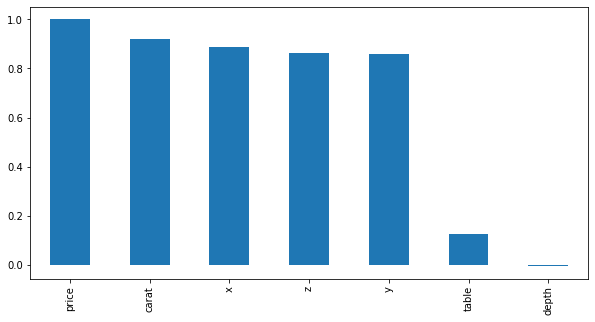

In [23]:
corr_mat = train.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

### Distribution and relationships between variables 

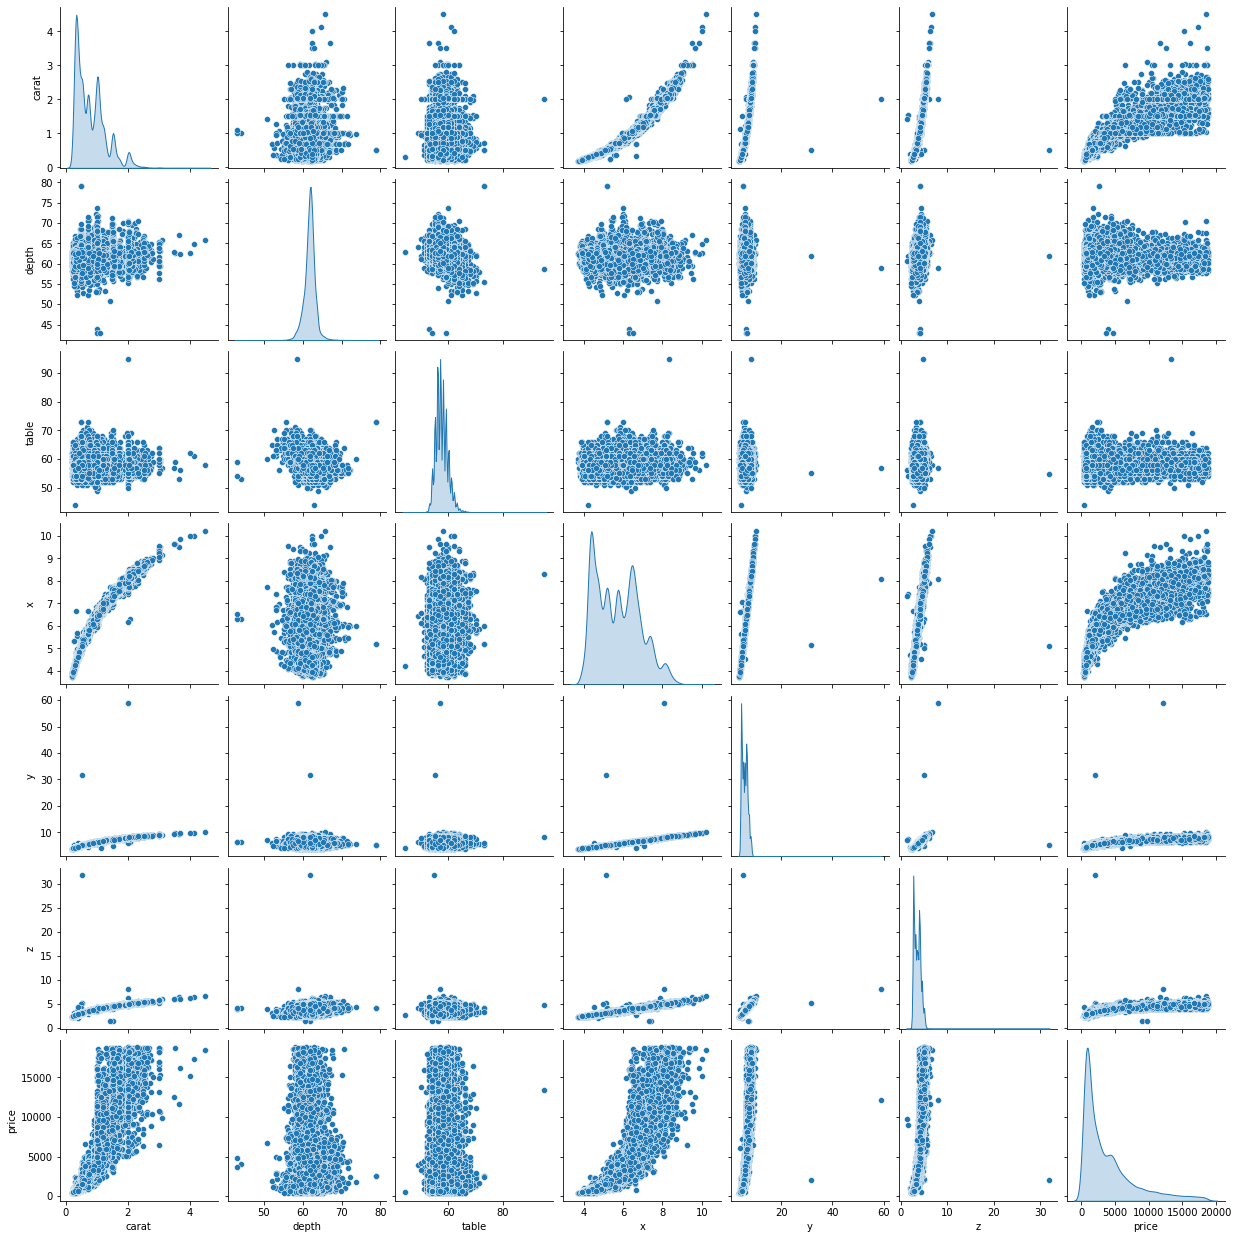

In [24]:
sns.pairplot(train , diag_kind = 'kde');

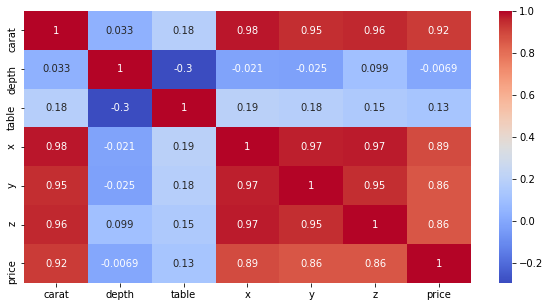

In [25]:
# with numbers
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(),annot = True , cmap = 'coolwarm' );

### Numerical and categorical columns

In [26]:
num_cols = list(train._get_numeric_data().columns)
print("Numerical columns: ", num_cols)

cat_cols=list(set(train.columns) - set(num_cols))
print("Categorical columns: ", cat_cols)

Numerical columns:  ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical columns:  ['color', 'clarity', 'cut']


### Plot the distributions of numerical attributes

C:\Users\pinil\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


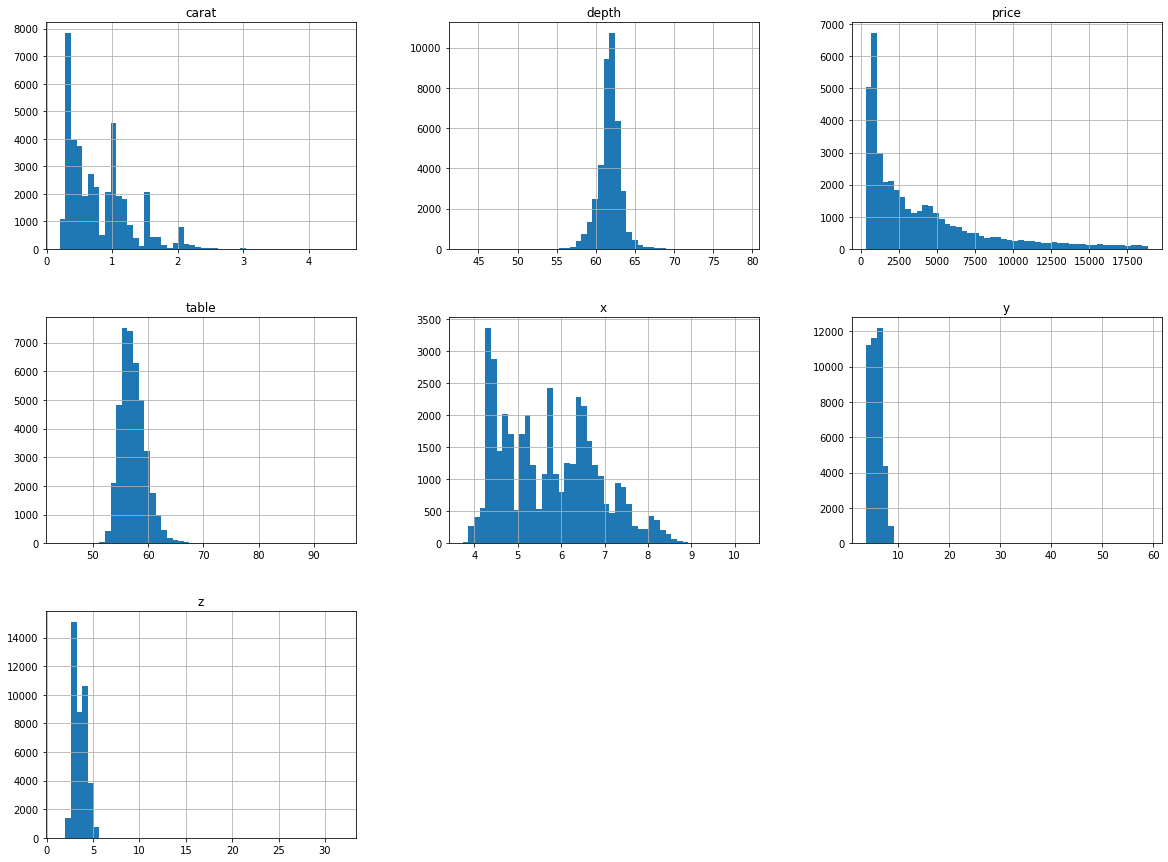

In [27]:
train.hist(bins=50,figsize=(20,15))
plt.show()

In [28]:
### Plot categorical columns vs. target price
#for col in cat_cols:
   #sns.catplot(x=col, y="price",
            #kind="box", dodge=False, height = 5, aspect = 3,data=train,);    

In [29]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train["cut_numeric"] = le.fit_transform(train["cut"])
train["color_numeric"] = le.fit_transform(train["color"])
train["clarity_numeric"] = le.fit_transform(train["clarity"])

#drop categorical columns after LablEncoder process
train=train.copy()
train.drop(cat_cols, axis=1, inplace=True)
train.head()

,carat,depth,table,x,y,z,price,cut_numeric,color_numeric,clarity_numeric
id,,,,,,,,,,
0,0.71,57.0,68.0,6.05,5.87,3.40,2198,0,2,2
1,0.75,62.4,57.0,5.88,5.75,3.63,3822,3,2,7
2,0.70,59.1,65.0,5.75,5.85,3.43,2234,1,4,5
3,1.75,60.6,60.0,7.80,7.84,4.74,12416,3,5,4
4,1.18,59.7,58.0,6.94,6.90,4.13,9537,3,3,7


In [30]:
columnas_train = [a for a in train.columns if a not in ["price"]]
X = train[columnas_train]
y = train["price"]

In [31]:
# Assigning the featurs as X and trarget as y

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [32]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_ridbe=Pipeline([("scalar6",StandardScaler()),
                     ("rf_classifier",Ridge())])

pipeline_lasso=Pipeline([("scalar7",StandardScaler()),
                     ("rf_classifier",Lasso())])

pipeline_gbr=Pipeline([("scalar8",StandardScaler()),
                     ("rf_classifier",GradientBoostingRegressor())])

In [33]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, 
             pipeline_xgb, pipeline_ridbe,pipeline_lasso, pipeline_gbr]

In [34]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",
             3: "KNeighbors", 4: "XGBRegressor", 5:"Ridge", 6:"Lasso",
            7:'GradientBoostingRegressor'}

In [35]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [36]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1369.285777 
DecisionTree: -766.197579 
RandomForest: -561.390645 
KNeighbors: -854.294989 
XGBRegressor: -555.314632 
Ridge: -1368.878168 


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897213326.1369629, tolerance: 43892623.95502597
  model = cd_fast.enet_coordinate_descent(


Lasso: -1361.247650 
GradientBoostingRegressor: -682.375282 


** Cálculo del error medio absoluto, del error medio cuadrático y del error medio cuadrático

* MAE es el más fácil de entender, porque es el error medio.
* El MSE es más popular que el MAE, porque el MSE "castiga" los errores más grandes, lo que suele ser útil en el mundo real.
* RMSE es aún más popular que MSE, es la raíz cuadrada del MSE y mide la desviación estándar de los residuos. Todas estas son funciones de pérdida, porque queremos minimizarlas.
* R2 : El coeficiente de determinación mide cuanta de la variación de 𝑦 es explicada por el modelo. Si la varianza de los errores o residuales 𝜎2𝑒 es cero, el modelo explica el 100% de la variable 𝑦. Si 𝜎2𝑒 es igual a la varianza de 𝑦 el modelo no explica nada y 𝑅2 vale cero.

From the above scores, GradientBoostingRegressor appears to be the model with the best score on the negative mean squared error. Let’s test this model on the test set and evaluate with different parameters:

In [37]:
for i, model in enumerate(pipelines):
    pred = model.predict(X_test)
    print(pipelines[i],"R^2:",metrics.r2_score(y_test, pred))
    print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    print("MAE:",metrics.mean_absolute_error(y_test, pred))
    print("MSE:",metrics.mean_squared_error(y_test, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

Pipeline(steps=[('scalar1', StandardScaler()),
                ('lr_classifier', LinearRegression())]) R^2: 0.8858362483542741
Adjusted R^2: 0.8857345182785502
MAE: 848.5288471684262
MSE: 1773347.71402523
RMSE: 1331.6710231980082
Pipeline(steps=[('scalar2', StandardScaler()),
                ('dt_classifier', DecisionTreeRegressor())]) R^2: 0.9629998830006857
Adjusted R^2: 0.9629669125993993
MAE: 368.24950544015826
MSE: 574736.481181998
RMSE: 758.1137653294511
Pipeline(steps=[('scalar3', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())]) R^2: 0.97965177132181
Adjusted R^2: 0.9796336392368492
MAE: 272.88433975790116
MSE: 316076.5504878342
RMSE: 562.2068573824355
Pipeline(steps=[('scalar4', StandardScaler()),
                ('rf_classifier', KNeighborsRegressor())]) R^2: 0.9550271252741499
Adjusted R^2: 0.9549870504352853
MAE: 417.72263105835805
MSE: 698580.2712205737
RMSE: 835.8111456666354
Pipeline(steps=[('scalar5', StandardScaler()),
                ('rf

In [38]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9799277713489916
Adjusted R^2: 0.9799098852046491
MAE: 284.0422403790241
MSE: 311789.3401411374
RMSE: 558.3809990867682


In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
id,,
1210,4744,4337.776367
29908,12681,15783.226562
22307,631,685.843933
5731,4604,4656.357422
34685,3045,2935.154297
...,...,...
15586,7295,6854.563965
28712,8529,8566.211914
5847,3669,3876.429688


In [40]:
# comparing a sample of 25 on a graph

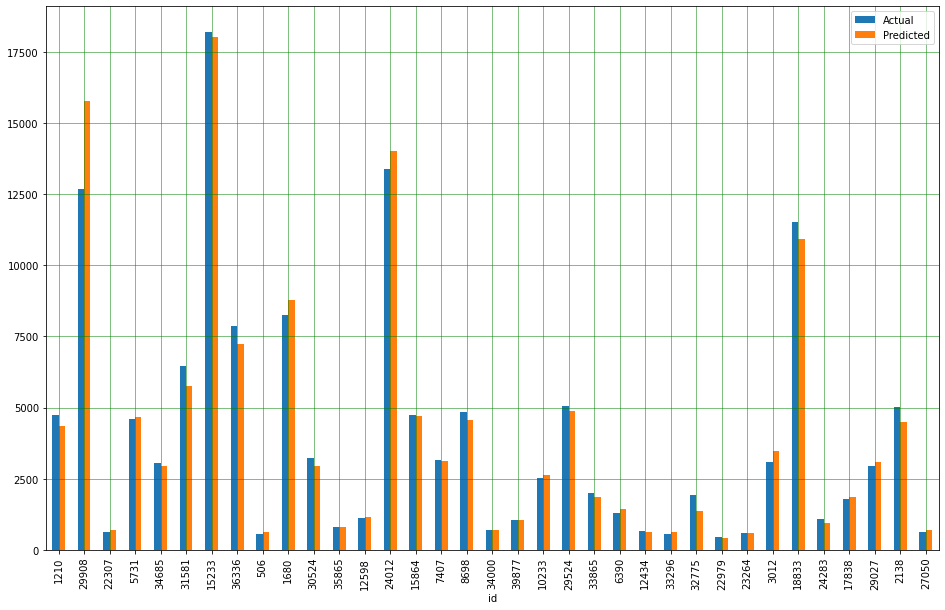

In [41]:
df1 = df.head(35)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Let's reprocessing test predict the same way as train

In [42]:
predict= pd.read_csv('predict.csv', index_col=0)

In [43]:
predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.54,Premium,E,VS2,61.3,59.0,5.26,5.21,3.21
1,0.32,Ideal,J,VS2,62.1,54.0,4.38,4.44,2.74
2,0.30,Good,H,VVS2,63.6,56.0,4.26,4.29,2.72
3,0.66,Very Good,F,SI1,59.2,58.0,5.69,5.72,3.38
4,0.42,Ideal,F,VS2,62.0,55.0,4.79,4.82,2.98


In [44]:
num_cols_predict = list(predict._get_numeric_data().columns)
print("Numerical columns: ", num_cols_predict)

cat_cols_predict=list(set(predict.columns) - set(num_cols_predict))
print("Categorical columns: ", cat_cols_predict)

Numerical columns:  ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical columns:  ['color', 'clarity', 'cut']


In [45]:
predict.shape

(13485, 9)

In [46]:
predict.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [47]:
carat_ranges_predict=sorted(predict.carat.unique())
print("Carat ranges from" ,min(carat_ranges_predict), "to",max(carat_ranges_predict))

Carat ranges from 0.2 to 5.01


In [48]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
predict["cut_numeric"] = le.fit_transform(predict["cut"])
predict["color_numeric"] = le.fit_transform(predict["color"])
predict["clarity_numeric"] = le.fit_transform(predict["clarity"])

#drop categorical columns after LablEncoder process
predict=predict.copy()
predict.drop(cat_cols, axis=1, inplace=True)
predict.head()

,carat,depth,table,x,y,z,cut_numeric,color_numeric,clarity_numeric
id,,,,,,,,,
0,0.54,61.3,59.0,5.26,5.21,3.21,3,1,5
1,0.32,62.1,54.0,4.38,4.44,2.74,2,6,5
2,0.30,63.6,56.0,4.26,4.29,2.72,1,4,7
3,0.66,59.2,58.0,5.69,5.72,3.38,4,2,2
4,0.42,62.0,55.0,4.79,4.82,2.98,2,2,5


In [49]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 0 to 13484
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            13485 non-null  float64
 1   depth            13485 non-null  float64
 2   table            13485 non-null  float64
 3   x                13485 non-null  float64
 4   y                13485 non-null  float64
 5   z                13485 non-null  float64
 6   cut_numeric      13485 non-null  int32  
 7   color_numeric    13485 non-null  int32  
 8   clarity_numeric  13485 non-null  int32  
dtypes: float64(6), int32(3)
memory usage: 895.5 KB


In [50]:
columnas_predict = [a for a in predict.columns]
X_predict = predict[columnas_predict]
X_predict.shape

(13485, 9)

In [51]:
pred_final = pipeline_gbr.predict(X_predict)
pred_final=[round(x) for x in pred_final]

In [52]:
df_pred = pd.DataFrame({'price': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,price
id,
0,1871
1,262
2,654
3,2249
4,1091
...,...
13480,4709
13481,1193
13482,6280


In [53]:
df_pred.to_csv('df_lab_encoder.csv')